In [1]:
# Importing Dataset
dir =  '../../Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 14 - Logistic Regression/R/Social_Network_Ads.csv'
dataset = read.csv(dir)

In [2]:
dataset = dataset[3:5]

In [3]:
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))
#dataset$Gender = factor(dataset$Gender,
#                        levels = c('Male', 'Female'),
#                        labels = c( 1, 2))

In [4]:
library('caTools')
set.seed(123)

In [5]:
split = sample.split(dataset$Purchased, SplitRatio=0.75 )
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split==FALSE)

In [6]:
#Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

In [7]:
nrow(dataset)
nrow(training_set)
nrow(test_set)

[1] 400

[1] 300

[1] 100

In [8]:
library(e1071)

In [9]:
training_set

,Age,EstimatedSalary,Purchased
1,-1.7655475,-1.47334137,0
3,-1.0962966,-0.78837605,0
6,-1.0006894,-0.36027273,0
7,-1.0006894,0.38177303,0
8,-0.5226531,2.26542765,1
10,-0.2358313,-0.16049118,0
11,-1.0962966,0.26761214,0
13,-1.6699402,0.43885347,0
14,-0.5226531,-1.50188159,0
15,-1.8611548,0.32469259,0


In [10]:
classifier = svm(formula = Purchased ~ .,
                 data = training_set,
                 type = 'C-classification',
                 kernel = 'radial')

In [11]:
y_pred = predict(classifier, newdata=test_set[,-3])

In [12]:
table(test_set$Purchased)


 0  1 
64 36 

In [13]:
table(y_pred)

y_pred
 0  1 
62 38 

In [14]:
mean(y_pred == test_set$Purchased)

[1] 0.9

In [15]:
summary(classifier)


Call:
svm(formula = Purchased ~ ., data = training_set, type = "C-classification", 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  77

 ( 39 38 )


Number of Classes:  2 

Levels: 
 0 1




In [16]:
cm = table(test_set[, 3], y_pred)

In [17]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [18]:
#K Fold #
folds = createFolds(training_set$Purchased,k = 10)

In [29]:
cv = lapply(folds, function(x){
    training_fold = training_set[-x,]
    test_fold = training_set[-x,]
    classifier = svm(formula = Purchased ~ .,
                 data = training_fold,
                 type = 'C-classification',
                 kernel = 'radial')
    y_pred = predict(classifier, newdata=test_fold[,-3])
    cm = table(test_fold[, 3], y_pred)
    acc = ( cm[1,1] + cm[2,2]) / (cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2])
    return (acc)
})

In [35]:
acc = mean(as.numeric(cv))
acc

[1] 0.9151762

In [40]:
#GRID SEARCH
classifier = train(form = Purchased ~ .,data = training_set, method = 'svmRadial')
classifier

Support Vector Machines with Radial Basis Function Kernel 

300 samples
  2 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 300, 300, 300, 300, 300, 300, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa   
  0.25  0.8982536  0.777349
  0.50  0.9022548  0.786193
  1.00  0.9051294  0.792165

Tuning parameter 'sigma' was held constant at a value of 1.28263
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 1.28263 and C = 1.

In [41]:
classifier$bestTune

,sigma,C
3,1.28263,1


In [32]:
library(ElemStatLearn)

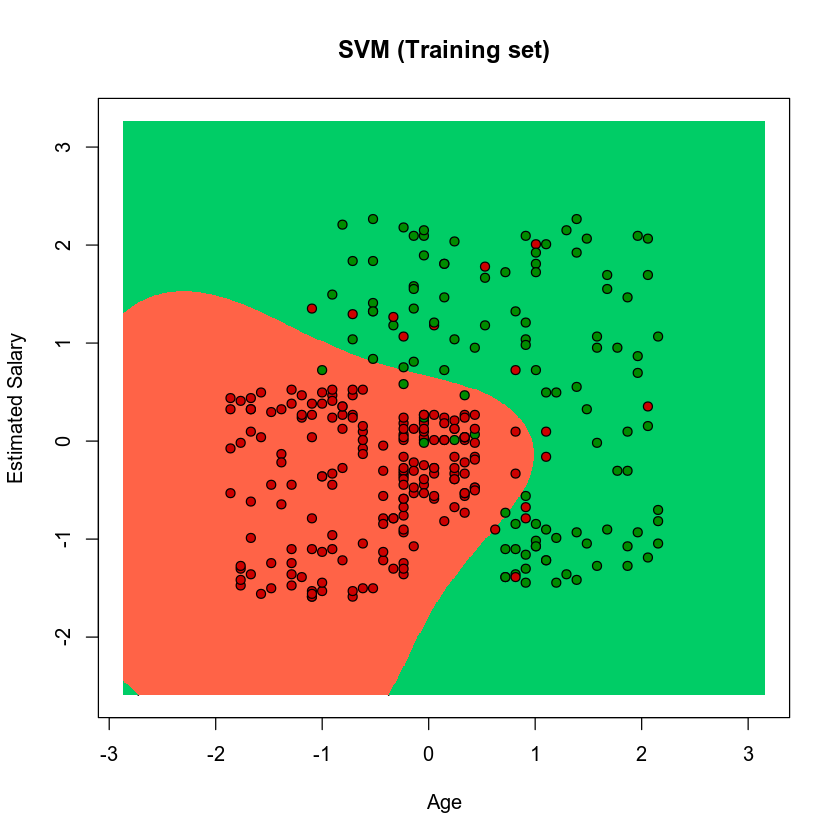

In [33]:
set = training_set


X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')

y_grid = predict(classifier, newdata=grid_set)
plot(set[,-3],
     main = 'SVM (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

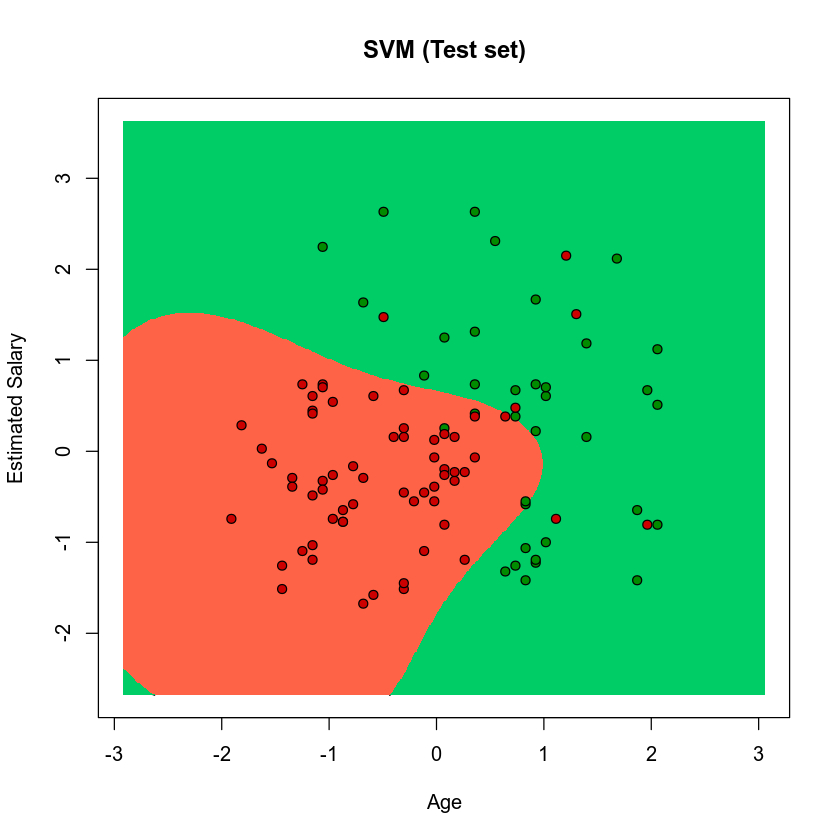

In [34]:
set = test_set


X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')

y_grid = predict(classifier, newdata=grid_set)
plot(set[,-3],
     main = 'SVM (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))